<a href="https://colab.research.google.com/github/surendarmanoj/data-science/blob/main/Ridge_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


In [3]:
data = load_diabetes()

In [5]:
data.DESCR


'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n:Number of Instances: 442\n\n:Number of Attributes: First 10 columns are numeric predictive values\n\n:Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n:Attribute Information:\n    - age     age in years\n    - sex\n    - bmi     body mass index\n    - bp      average blood pressure\n    - s1      tc, total serum cholesterol\n    - s2      ldl, low-density lipoproteins\n    - s3      hdl, high-density lipoproteins\n    - s4      tch, total cholesterol / HDL\n    - s5      ltg, possibly log of serum triglycerides level\n    - s6      glu, blood sugar level\n\nNote: Each of thes

In [13]:
X = data.data

In [14]:
y = data.target


In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [18]:
lr = LinearRegression()

In [19]:
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = lr.predict(X_test)
y_pred

array([226.51848598, 157.46329293,  89.86172648, 207.92043638,
       175.27464325, 146.48196423, 131.11782081,  97.37923306,
       102.94499199, 181.69238112, 237.97531281, 134.74726724,
       189.44205531,  59.92873145, 179.98730177, 117.78561801,
       120.30969646, 126.66229732, 165.19425279, 147.78162151,
       145.4387221 , 124.41329425,  51.96058948, 227.75415791,
       218.10133602, 129.82865712, 160.13538356, 201.17200936,
       184.84143661,  68.90970369, 237.00685674,  58.17158783,
       154.39979192, 119.15941043, 234.0319742 , 172.80143208,
       139.94775146, 169.99263492, 214.59145267, 220.47784209,
       128.98250674, 186.20992149, 162.87053192, 179.77640803,
       107.76869146, 249.52929292, 140.92355113,  32.74846723,
       177.96181001, 145.76575416, 291.96774118, 125.71074727,
       107.27012754, 156.10001536, 115.93096259, 160.35263722,
       229.48001183, 173.38808746, 159.87971544, 123.05044568,
        88.54923021, 122.87202843, 169.12811086, 101.97

In [23]:
print(lr.coef_)
print(lr.intercept_)

[  23.45465406 -247.42747406  492.1087518   329.35876431 -970.79723039
  573.54295519  182.42162368  255.92168168  794.21609282   89.32249214]
152.13623331746496


In [25]:
print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.5188113124539249
RMSE 48.72713760953253


In [46]:
ri = Ridge(alpha=100)

In [47]:
ri.fit(X_train, y_train)


Ridge(alpha=100)

In [48]:
y_pred1=ri.predict(X_test)

In [49]:
y_pred1

array([153.69127458, 152.80293997, 150.10479259, 152.92641412,
       152.95683526, 151.77391792, 151.41060275, 150.24233779,
       150.48385843, 153.04078608, 154.42365038, 150.98146708,
       152.99128199, 150.03396521, 152.53390126, 151.10004045,
       151.15520696, 151.97945131, 152.30220053, 151.63870262,
       150.5077425 , 152.04182195, 150.10054085, 154.55532111,
       154.4585932 , 150.96167249, 153.2712526 , 152.80211227,
       152.46735352, 149.95547668, 153.67052518, 149.67732908,
       151.71581458, 150.95265696, 153.25075276, 152.1525374 ,
       151.59422034, 152.91668657, 153.46714453, 154.07070136,
       151.20842639, 152.86237423, 151.79107812, 152.30384153,
       150.71203958, 154.46738996, 151.57557681, 149.64872176,
       152.66179465, 150.97999064, 154.1761369 , 150.81077061,
       151.26198442, 151.18944695, 150.72415388, 152.51041576,
       154.3826412 , 153.71560064, 151.48220748, 150.13334271,
       149.84773711, 152.52286918, 151.73131799, 149.79

In [50]:
print("R2 score",r2_score(y_test,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 score 0.025224686457473333
RMSE 69.35303270526724


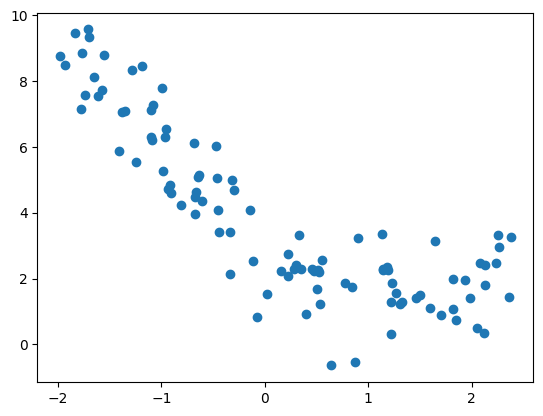

In [51]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

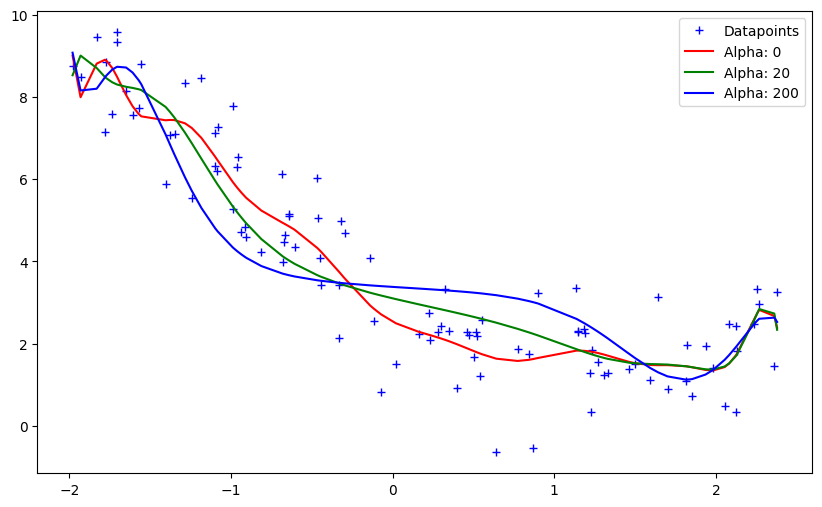

In [53]:


def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

In [55]:
df = pd.DataFrame(data.data,columns=data.feature_names)
df['TARGET'] = data.target

In [56]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,TARGET
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [57]:
coefs = []
r2_scores = []

for i in [0,10,100,1000]:
    reg = Ridge(alpha=i)
    reg.fit(X_train,y_train)

    coefs.append(reg.coef_.tolist())
    y_pred = reg.predict(X_test)
    r2_scores.append(r2_score(y_test,y_pred))

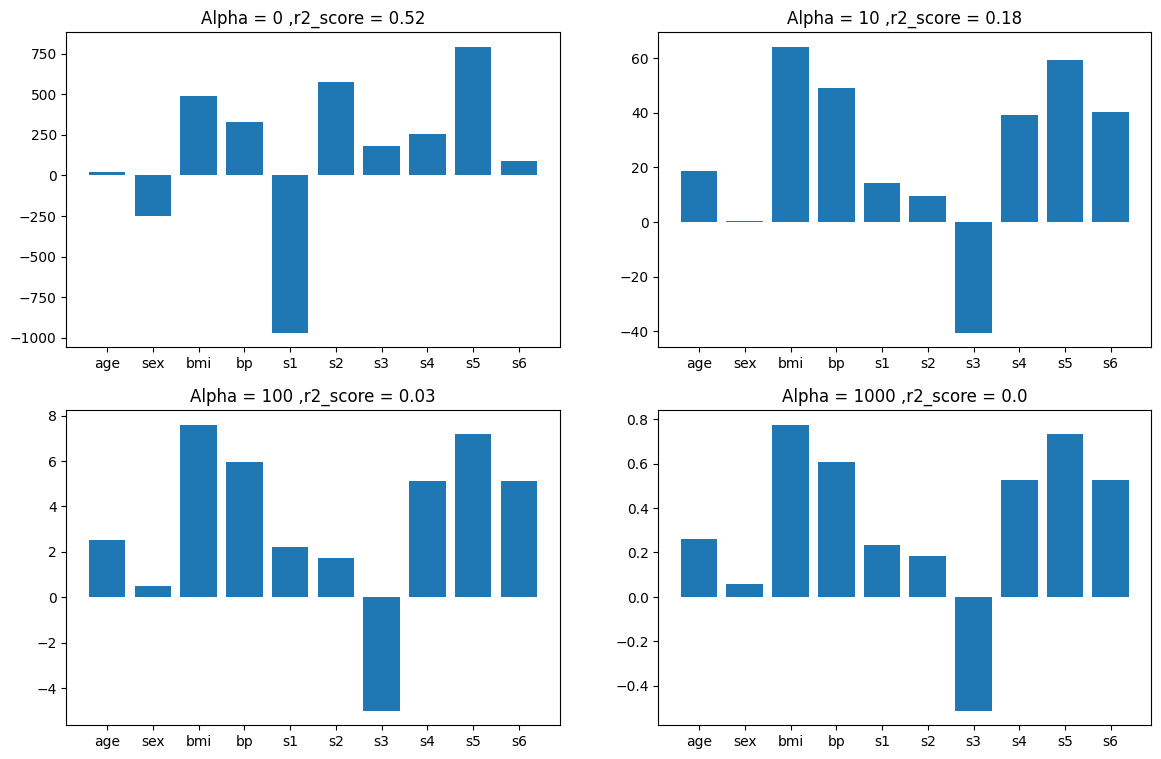

In [58]:
plt.figure(figsize=(14,9))
plt.subplot(221)
plt.bar(data.feature_names,coefs[0])
plt.title('Alpha = 0 ,r2_score = {}'.format(round(r2_scores[0],2)))

plt.subplot(222)
plt.bar(data.feature_names,coefs[1])
plt.title('Alpha = 10 ,r2_score = {}'.format(round(r2_scores[1],2)))

plt.subplot(223)
plt.bar(data.feature_names,coefs[2])
plt.title('Alpha = 100 ,r2_score = {}'.format(round(r2_scores[2],2)))

plt.subplot(224)
plt.bar(data.feature_names,coefs[3])
plt.title('Alpha = 1000 ,r2_score = {}'.format(round(r2_scores[3],2)))

plt.show()

In [62]:
alphas = [0,0.0001,0.0005,0.001,0.005,0.1,0.5,1,5,10]

coefs = []

for i in alphas:
    reg = Ridge(alpha=i)
    reg.fit(X_train,y_train)

    coefs.append(reg.coef_.tolist())

In [63]:
input_array = np.array(coefs).T

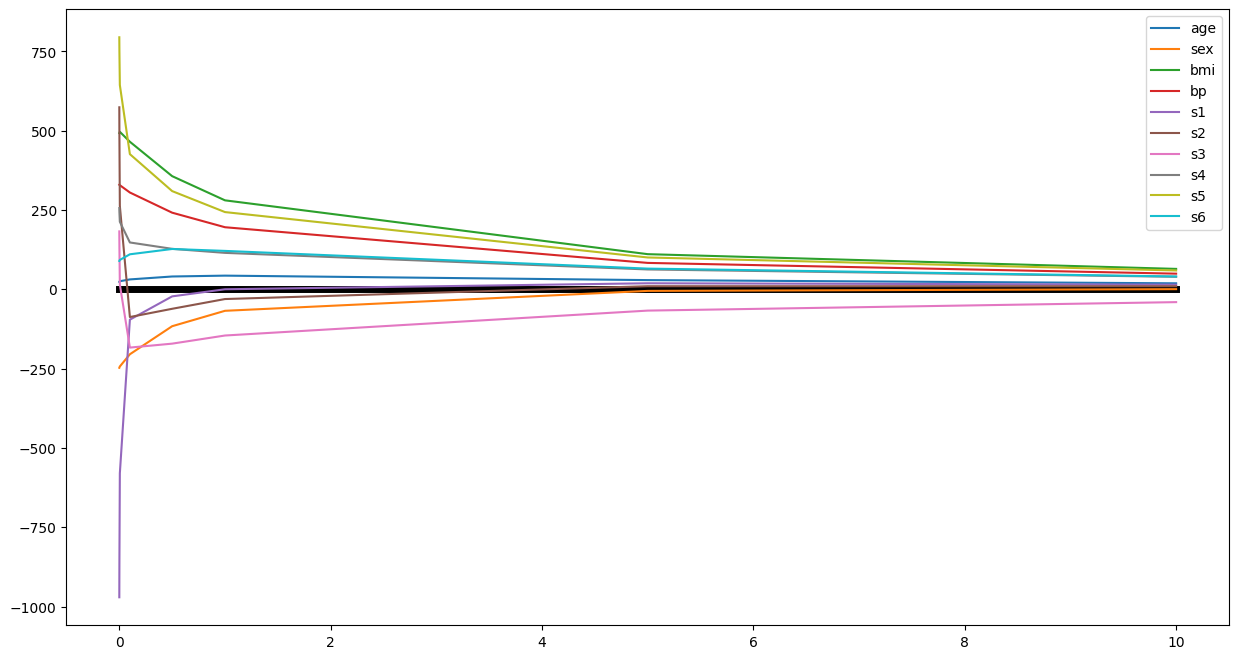

In [64]:
plt.figure(figsize=(15,8))
plt.plot(alphas,np.zeros(len(alphas)),color='black',linewidth=5)
for i in range(input_array.shape[0]):
    plt.plot(alphas,input_array[i],label=data.feature_names[i])
plt.legend()

[27.82809103]
-2.29474455867698


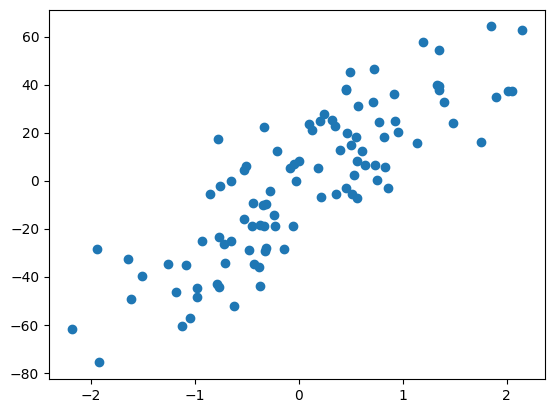

In [65]:
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)

In [66]:
def cal_loss(m,alpha):
    return np.sum((y - m*X.ravel() + 2.29)**2) + alpha*m*m

In [67]:
def predict(m):
    return m*X - 2.29

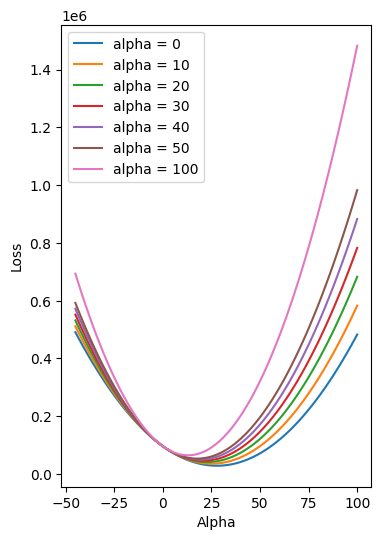

In [68]:
m = np.linspace(-45,100,100)
plt.figure(figsize=(4,6))
for j in [0,10,20,30,40,50,100]:
    loss = []
    for i in range(m.shape[0]):
        loss_i = cal_loss(m[i],j)
        loss.append(loss_i)
    plt.plot(m,loss,label='alpha = {}'.format(j))
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('Loss')
plt.show()